In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)



17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


The above code imports tensorflow, keras, and the imdb dataset from keras. It also nick names tensorflow "tf".

In [3]:
max([max(sequence) for sequence in train_data])


9999

This shows the maximum size of each piece of data

In [4]:
import numpy as np

This imports numpy as np

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

This encodes the integer sequences by using hot encoding

In [7]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

This tells the computer what kind of model we want to use. Here you deside things like the amount of layers you want and what activation function you would like to use

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

This creates a validation set to help train the model

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

This is the code that compiles the model

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.6880 - loss: 0.6101 - val_accuracy: 0.8696 - val_loss: 0.4015
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8895 - loss: 0.3528 - val_accuracy: 0.8598 - val_loss: 0.3492
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9154 - loss: 0.2567 - val_accuracy: 0.8845 - val_loss: 0.2920
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9341 - loss: 0.2013 - val_accuracy: 0.8881 - val_loss: 0.2771
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9479 - loss: 0.1643 - val_accuracy: 0.8870 - val_loss: 0.2776
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9565 - loss: 0.1377 - val_accuracy: 0.8870 - val_loss: 0.2918
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9591 - loss: 0.1259 - val_accuracy: 0.8853 - val_loss: 0.3017
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9722 - loss: 0.0989 - val_accuracy: 0.8665 - v

This  trains the model

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

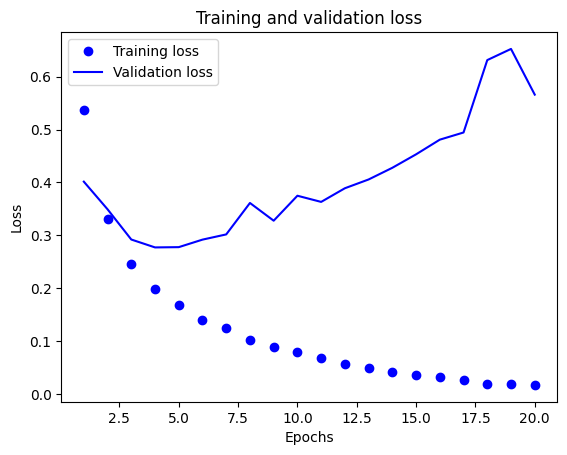

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

This creates a graph showing the training and validation loss

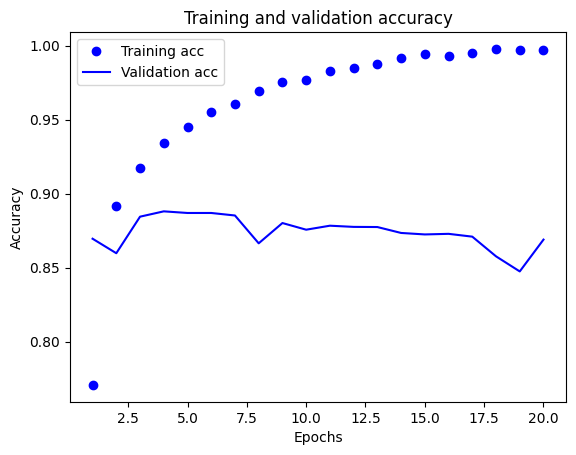

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

This creates a graph showing the training and validation accuracy

It should be noted in order to make this file more readable I have not included seprate code for each time that I have run the The training and validation loss/accuracy graphs. I used the above code and modified the model it runs off of to get the correct epoc number for each model.

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7048 - loss: 0.6099
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.8890 - loss: 0.3441
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9133 - loss: 0.2492
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9338 - loss: 0.1970
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9399 - loss: 0.1734
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8834 - loss: 0.2866


With the orgional model set up from class the accuracy is 0.8852 and the loss is 0.2850

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6992 - loss: 0.5763
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8993 - loss: 0.2896
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9214 - loss: 0.2154
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8859 - loss: 0.2823


With adding another hidden layer in the model definition step the training and validation accuracy and training and validation loss graphs showed 3 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8832 and the loss is 0.2854

In [16]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7179 - loss: 0.5409
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8999 - loss: 0.2665
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8695 - loss: 0.3152


With using layers with more hidden units in the model definition step the training and validation accuracy and training and validation loss graphs showed 2 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8782 and the loss is 0.2939

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7290 - loss: 0.1937
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9003 - loss: 0.0888
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9222 - loss: 0.0677
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8866 - loss: 0.0855


With using the "mse" loss function instead of "binary_crossentropy" in the model definition step the training and validation accuracy and training and validation loss graphs showed 3 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8819 and the loss is 0.0894

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7410 - loss: 0.5322
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9090 - loss: 0.2539
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9296 - loss: 0.1932
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8788 - loss: 0.3021


With using the "tanh" activation instead of "relu" in the model definition step the training and validation accuracy and training and validation loss graphs showed 3 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8868 and the loss is 0.2857



In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.L2(0.01)),
    layers.Dense(1, activation="sigmoid", kernel_regularizer=regularizers.L2(0.01))
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=16, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7307 - loss: 0.9170
Epoch 2/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8846 - loss: 0.5708
Epoch 3/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8927 - loss: 0.5114
Epoch 4/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8984 - loss: 0.4833
Epoch 5/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9001 - loss: 0.4616
Epoch 6/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8971 - loss: 0.4540
Epoch 7/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9013 - loss: 0.4393
Epoch 8/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.8972 - loss: 0.4374
Epoch 9/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9008 - loss: 0.4301
Epoch 10/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8994 - loss: 0.4263
Epoch 11/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9016 - loss: 0.4200
Epoch 12/16
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy:

With using the the L2 regularization in the model definition step the training and validation accuracy and training and validation loss graphs showed 16 epochs as the best number to use so I changed that value when retraing the model from scratch. And the accuracy is 0.8712  and the loss is 0.4673

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9123 - loss: 0.3951 - val_accuracy: 0.9053 - val_loss: 0.4013
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9180 - loss: 0.3857 - val_accuracy: 0.8965 - val_loss: 0.4188
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9219 - loss: 0.3787 - val_accuracy: 0.8720 - val_loss: 0.4638
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9242 - loss: 0.3755 - val_accuracy: 0.8846 - val_loss: 0.4422
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9249 - loss: 0.3712 - val_accuracy: 0.8868 - val_loss: 0.4363
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9267 - loss: 0.3742 - val_accuracy: 0.8802 - val_loss: 0.4474
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9217 - loss: 0.3761 - val_accuracy: 0.8835 - val_loss: 0.4440
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9286 - loss: 0.3674 - val_accuracy: 0.8732 - v

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

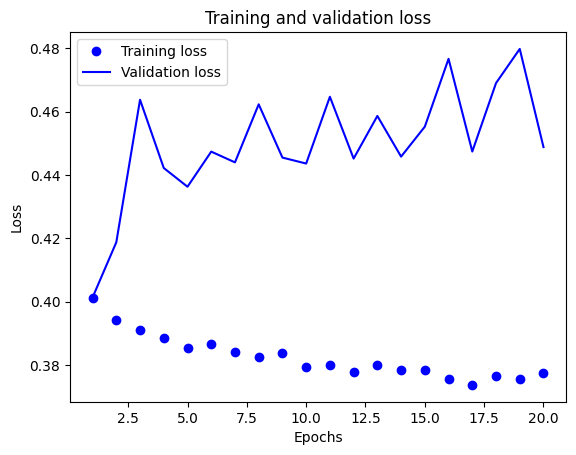

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

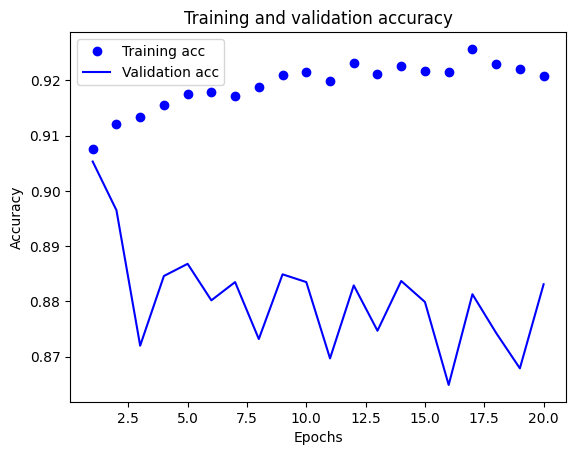

In [23]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()